<a href="https://colab.research.google.com/github/Mashnica/PPPO_2021/blob/main/GAN_IT1_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predmet: Principi prezentacije i prepoznavanja oblika

Student: Maša Mićunović IT1/2017

Tema: GAN














**Sadržaj**

1.Uvod

2.Objašnjenje kako GAN funkcioniše

3.Realizacija zadatka

4.Zaključak

5.Reference

**Uvod**

GAN(Generative Adeverserial Network)

Generativna kontradiktorna mreža(GAN) je generativni model koji definiše kontradiktorni mrežni okvir i sastoji se od nekoliko modela(oba modela su CNN-ovi). Sastoji se od generatora i diskriminatora, čiji je cilj stvaranje novih realističkih fotografija kada je dat skup trening fotografija. Generator uči da generiše nove lažne fotografije koje izgledaju kao stvarne fotografije, dok diskriminator uči da utvrdi da li je uzorak stvarna ili lažna fotografija.  

**Objašnjenje kako GAN funkcioniše**

**G** za generator- ovo je model koji uzima ulaz kao signal slučajnog šuma a zatim daje sliku.

**A** za diskriminator odnosno kotradiktornost- ima sposobnost učenja o predmetima, životinjama ili drugim navedenim karakteristikama. Na primer ako učita slike pasa ili ne pasa, moći će da identifikuje razliku između njih. 
Koristeći ovaj primer, nakon što je  diskriminator obučen, pokazujući diskriminatoru sliku koje nije pas vratiće 0, a ukoliko mu se prikaže slika psa vratiće 1.

**N** za mrežu- što znači da su generator i diskriminator neuronske mreže.

**GAN proces**

Korak 1. U generator unosimo slučajni signal buke. Generator stvara neke slike koje se koriste za obuku diskriminatora. Diskriminatoru pružamo neke karakteristike/slike koje želimo da nauči, a diskriminator daje verovatnoće. Ove verovatnoće mogu biti prilično velike jer je diskriminator tek počeo da se obučava. Vrednosti se zatim procenjuju i identifikuju. Greška se iztačunava i ona se širi putem diskriminatora, gde se ponderi ažuriraju.

Zatim treniramo generator. Uzimamo grupu slika koje je stvorio i ponovo ih stavljamo kroz diskriminator. Ne uključujemo slike karakteristika. Generator uči varajući diskriminatora u njega ispisujući lažno pozitivne rezultate.

Diskriminator će dati izlaz verovatnoće. Verovatnoće se zatim procenjuju i upoređuju sa onim što su trebale biti.Greška se izračunava i reprodukuje unazad kroz generator, a ponderi se ažuriraju.


Korak 2. Ovo je isto kao i korak 1. ali generator i diskriminator su obučeni malo više. Pomoću povratnog širenja generator razume svoje greške i počinje da ih  čini sličnijim karakteristikama.

Ovo je stvoreno putem Dekonvolucione neuronske mreže.

GAN se može koristiti za sledeće:

-generisanje slika

-modifikacije slike

-super rezolucija

-pomoć umetnicima

-fotografije sa realističnim slikama

-generisanje govora

-starenje lica


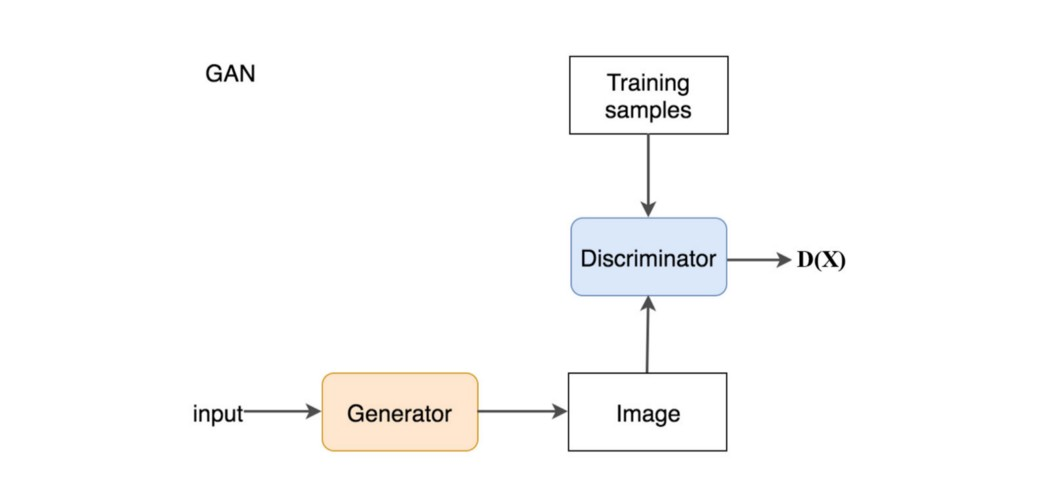

**Realizacija zadatka**

Nakon obuke, generator je robot koji generiše fotografije pasa. Tokom treninga diskriminator uči generator kako da nacrta psa. (I obično G uči D-a da prikriva stvarne od lažnih pasa). Generator nikada ne vidi slike pasa. Umesto toga, kontinuirano pokušava da nacrta psa i trenira ga diskriminator.

Potrebno je povezivanje Google Colab-a sa Google Drive-om kako bi se omogućili importovanje fajlova koji su dobijeni u sklopu projektnog zadatka.

In [ ]:
!unzip /content/drive/MyDrive/all-dogs.zip

Archive:  /content/drive/MyDrive/all-dogs.zip
replace all-dogs/n02109961_16718.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dobijeni fajlovi su zapakovani pa je neophodno izvršiti njihovo raspakovanje korišćenjem komande "!unzip"

Unzipovanje fotografija iz  fajla all-dogs.zip

Unzipovanje anotacija.

In [ ]:
!unzip /content/drive/MyDrive/Annotation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Annotation/n02088094-Afghan_hound/n02088094_5285  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_5285  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_4501  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_4501  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_13442  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_13442  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_8764  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_8764  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3982  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3982  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3949  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3949  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_1410  
  inflating: __MACOSX/Annotation/n02088094-Afghan

Sledeći korak jeste učitavanje i postavljanje fotografije na fiksnu veličinu kao i sam prikaz istih.

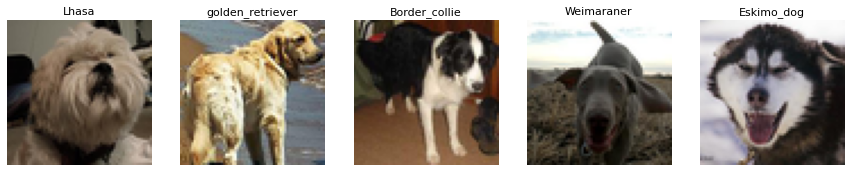

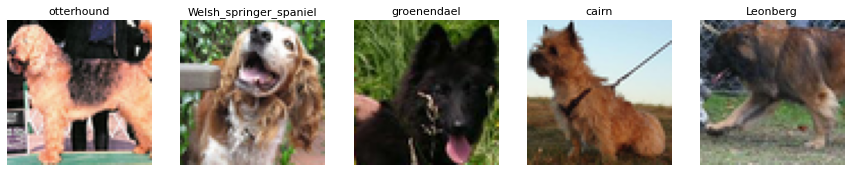

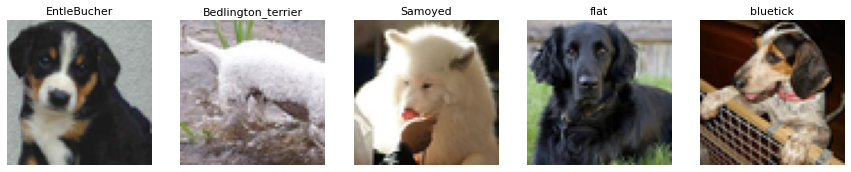

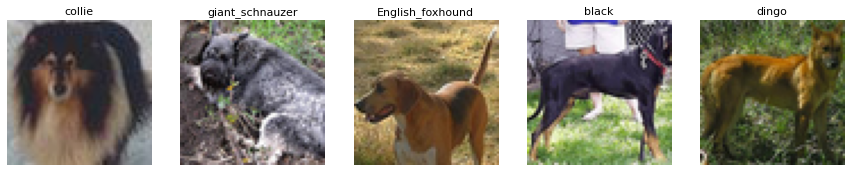

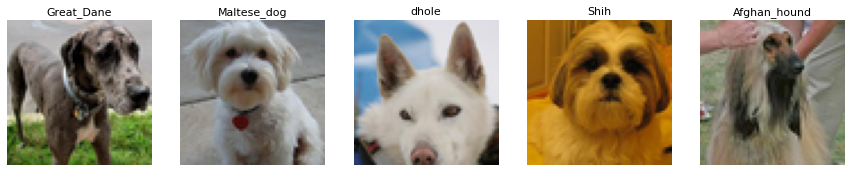

In [ ]:
ComputeLB = True
DogsOnly = True

import numpy as np, pandas as pd, os
import xml.etree.ElementTree as ET 
import matplotlib.pyplot as plt, zipfile 
from PIL import Image 

ROOT = '/content/'
if not ComputeLB: ROOT = '../content/'
IMAGES = os.listdir(ROOT + 'all-dogs')
breeds = os.listdir(ROOT + 'Annotation') 

idxIn = 0; namesIn = []
imagesIn = np.zeros((25000,64,64,3))

# CROP WITH BOUNDING BOXES TO GET DOGS ONLY
# https://www.kaggle.com/paulorzp/show-annotations-and-breeds
if DogsOnly:
    for breed in breeds:
        for dog in os.listdir(ROOT+'Annotation/'+breed):
            try: img = Image.open(ROOT+'all-dogs/'+dog+'.jpg') 
            except: continue           
            tree = ET.parse(ROOT+'Annotation/'+breed+'/'+dog)
            root = tree.getroot()
            objects = root.findall('object')
            for o in objects:
                bndbox = o.find('bndbox') 
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                w = np.min((xmax - xmin, ymax - ymin))
                img2 = img.crop((xmin, ymin, xmin+w, ymin+w))
                img2 = img2.resize((64,64), Image.ANTIALIAS)
                imagesIn[idxIn,:,:,:] = np.asarray(img2)
                #if idxIn%1000==0: print(idxIn)
                namesIn.append(breed)
                idxIn += 1
    idx = np.arange(idxIn)
    np.random.shuffle(idx)
    imagesIn = imagesIn[idx,:,:,:]
    namesIn = np.array(namesIn)[idx]
    
# RANDOMLY CROP FULL IMAGES
else:
    x = np.random.choice(np.arange(20579),10000)
    for k in range(len(x)):
        img = Image.open(ROOT + 'all-dogs/' + IMAGES[x[k]])
        w = img.size[0]
        h = img.size[1]
        sz = np.min((w,h))
        a=0; b=0
        if w<h: b = (h-sz)//2
        else: a = (w-sz)//2
        img = img.crop((0+a, 0+b, sz+a, sz+b))  
        img = img.resize((64,64), Image.ANTIALIAS)   
        imagesIn[idxIn,:,:,:] = np.asarray(img)
        namesIn.append(IMAGES[x[k]])
        if idxIn%1000==0: print(idxIn)
        idxIn += 1
    
# DISPLAY CROPPED IMAGES
x = np.random.randint(0,idxIn,25)
for k in range(5):
    plt.figure(figsize=(15,3))
    for j in range(5):
        plt.subplot(1,5,j+1)
        img = Image.fromarray( imagesIn[x[k*5+j],:,:,:].astype('uint8') )
        plt.axis('off')
        if not DogsOnly: plt.title(namesIn[x[k*5+j]],fontsize=11)
        else: plt.title(namesIn[x[k*5+j]].split('-')[1],fontsize=11)
        plt.imshow(img)
    plt.show()

Importovnje neophodnih biblioteka:

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Reshape, Flatten, concatenate, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam

Kreiranje diskriminante:

In [ ]:
# BUILD DISCRIMINATIVE NETWORK
dog = Input((12288,))
dogName = Input((10000,))
x = Dense(12288, activation='sigmoid')(dogName) 
x = Reshape((2,12288,1))(concatenate([dog,x]))
x = Conv2D(1,(2,1),use_bias=False,name='conv')(x)
discriminated = Flatten()(x)

# COMPILE
discriminator = Model([dog,dogName], discriminated)
discriminator.get_layer('conv').trainable = False
discriminator.get_layer('conv').set_weights([np.array([[[[-1.0 ]]],[[[1.0]]]])])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# DISPLAY ARCHITECTURE
discriminator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 12288)]      0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 12288)        122892288   input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 24576)        0           input_5[0][0]                    
                                                                 dense_2[0][0]              

Obučićemo Diskriminator da pamti slike sa treninga:

In [ ]:
# TRAINING DATA
train_y = (imagesIn[:10000,:,:,:]/255.).reshape((-1,12288))
train_X = np.zeros((10000,10000))
for i in range(10000): train_X[i,i] = 1
zeros = np.zeros((10000,12288))

# TRAIN NETWORK
lr = 0.5
for k in range(2):
    annealer = LearningRateScheduler(lambda x: lr)
    h = discriminator.fit([zeros,train_X], train_y, epochs = 10, batch_size=256, callbacks=[annealer], verbose=0)
    print('Epoch',(k+1)*10,'/30 - loss =',h.history['loss'][-1] )
    if h.history['loss'][-1]<0.533: lr = 0.1

Epoch 10 /30 - loss = 0.5518195629119873
Epoch 20 /30 - loss = 0.5342633128166199


Brisanje fotografija za trening:

In [ ]:
del train_X, train_y, imagesIn

Discriminator Recalls from Memory Dogs


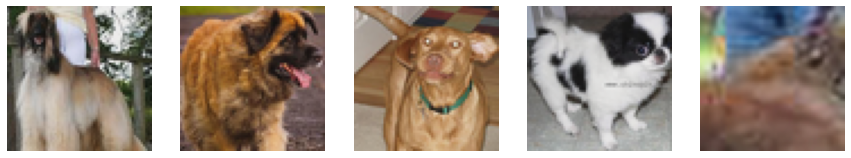

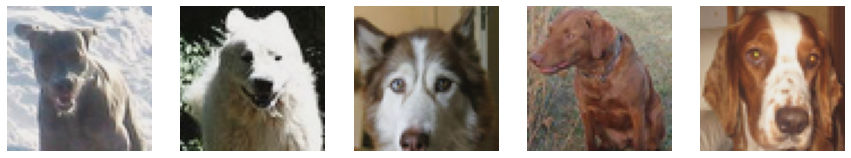

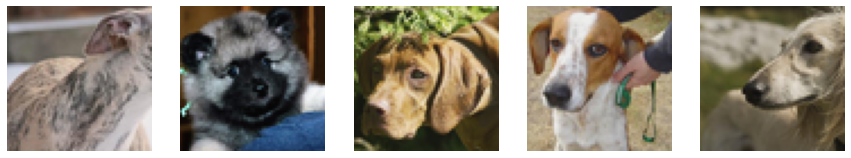

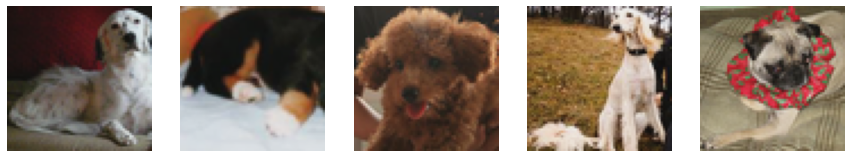

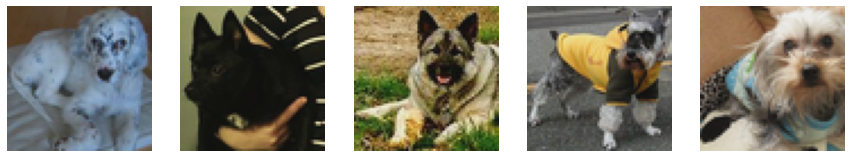

In [ ]:
print('Discriminator Recalls from Memory Dogs')    
for k in range(5):
    plt.figure(figsize=(15,3))
    for j in range(5):
        xx = np.zeros((10000))
        xx[np.random.randint(10000)] = 1
        plt.subplot(1,5,j+1)
        img = discriminator.predict([zeros[0,:].reshape((-1,12288)),xx.reshape((-1,10000))]).reshape((-1,64,64,3))
        img = Image.fromarray( (255*img).astype('uint8').reshape((64,64,3)))
        plt.axis('off')
        plt.imshow(img)
    plt.show()

Kreiranje Generator i GAN Namerno ćemo našem generatoru dati usko grlo u njegovo sećanje. Korišćenje loše memorije primorava Generator da nauči uopštavanje slika i da ih ne pamti tačno.

In [ ]:
# BUILD GENERATOR NETWORK
BadMemory = True

if BadMemory:
    seed = Input((10000,))
    x = Dense(2048, activation='elu')(seed)
    x = Reshape((8,8,32))(x)
    x = Conv2D(128, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(3, (3, 3), activation='linear', padding='same')(x)
    generated = Flatten()(x)
else:
    seed = Input((10000,))
    generated = Dense(12288, activation='linear')(seed)

# COMPILE
generator = Model(seed, [generated,Reshape((10000,))(seed)])

# DISPLAY ARCHITECTURE
generator.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2048)         20482048    input_7[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 8, 8, 32)     0           dense_3[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 8, 8, 128)    36992       reshape_3[0][0]                  
____________________________________________________________________________________________

In [ ]:
# BUILD GENERATIVE ADVERSARIAL NETWORK
discriminator.trainable=False    
gan_input = Input(shape=(10000,))
x = generator(gan_input)
gan_output = discriminator(x)

# COMPILE GAN
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(5), loss='mean_squared_error')

# DISPLAY ARCHITECTURE
gan.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
model_3 (Functional)            [(None, 12288), (Non 20612163    input_8[0][0]                    
__________________________________________________________________________________________________
model_2 (Functional)            (None, 12288)        122892290   model_3[0][0]                    
                                                                 model_3[0][1]                    
Total params: 143,504,453
Trainable params: 20,612,163
Non-trainable params: 122,892,290
__________________________________________________________________________________________________


Discriminator uči Generator U tipičnom GAN-u, diskriminator prethodno ne pamti slike treninga. Umesto toga, on uči da razlikuje stvarne slike od lažnih slika istovremeno kada i generator uči da pravi lažne.U ovom GAN-u naučili smo Diskriminator pre vremena i on će sada naučiti Generatora.

Epoch 1 /9 - loss = 0.24624603986740112


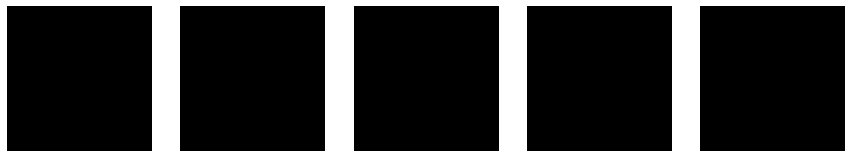

Epoch 2 /9 - loss = 0.2462460994720459


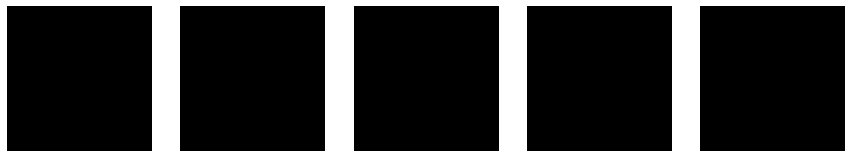

Epoch 3 /9 - loss = 0.24624603986740112


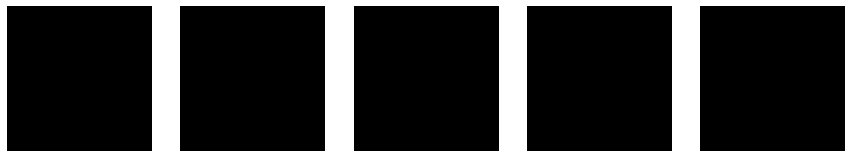

Epoch 4 /9 - loss = 0.2462461143732071


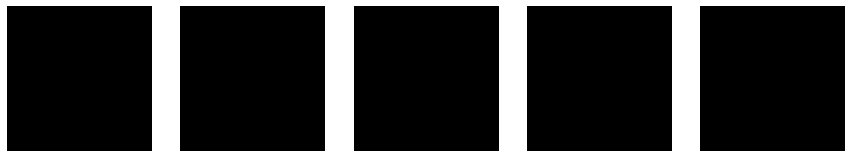

Epoch 5 /9 - loss = 0.2462460696697235


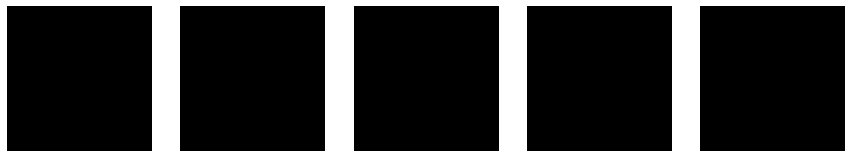

Epoch 6 /9 - loss = 0.2462460994720459


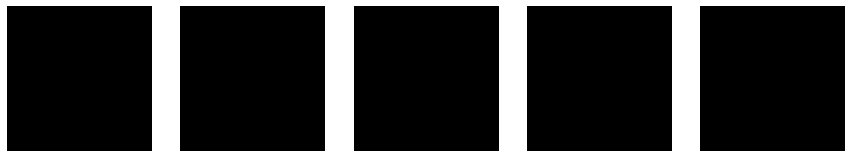

In [ ]:
# TRAINING DATA
train = np.zeros((10000,10000))
for i in range(10000): train[i,i] = 1
zeros = np.zeros((10000,12288))

# TRAIN NETWORKS
ep = 1; it = 9
if BadMemory: lr = 0.005
else: lr = 5.
    
for k in range(it):  

    # BEGIN DISCRIMINATOR COACHES GENERATOR
    annealer = LearningRateScheduler(lambda x: lr)
    h = gan.fit(train, zeros, epochs = ep, batch_size=256, callbacks=[annealer], verbose=0)

    # DISPLAY GENERATOR LEARNING PROGRESS 
    print('Epoch',(k+1),'/'+str(it)+' - loss =',h.history['loss'][-1] )
    plt.figure(figsize=(15,3))
    for j in range(5):
        xx = np.zeros((10000))
        xx[np.random.randint(10000)] = 1
        plt.subplot(1,5,j+1)
        img = generator.predict(xx.reshape((-1,10000)))[0].reshape((-1,64,64,3))
        img = Image.fromarray( (img).astype('uint8').reshape((64,64,3)))
        plt.axis('off')
        plt.imshow(img)
    plt.show()  
            
    # ADJUST LEARNING RATES
    if BadMemory:
        ep *= 2
        if ep>=32: lr = 0.001
        if ep>256: ep = 256
    else:
        if h.history['loss'][-1] < 25: lr = 1.
        if h.history['loss'][-1] < 1.5: lr = 0.5

Build Generator Class Naša generativna mreža je sada naučila sve slike sa treninga iz naših diskriminativnih mreža. Sa svojim lošim pamćenjem, nadamo se da je naučio da donekle generališe. Sada gradimo Generatorsku klasu koja prihvata bilo koji slučaj 100-dimenzionalnih vektora i daje sliku. Naša klasa će vratiti 70% jedne „memorisane“ slike pomešane sa 30% druge. Budući da su slike uskladištene u konvolucionoj mreži, nadamo se da ona generiše konceptualnu mešavinu (nasuprot mešavini piksela).

In [ ]:
class DogGenerator:
    index = 0   
    def getDog(self,seed):
        xx = np.zeros((10000))
        xx[self.index] = 0.70
        xx[np.random.randint(10000)] = 0.30
        img = generator.predict(xx.reshape((-1,10000)))[0].reshape((64,64,3))
        self.index = (self.index+1)%10000
        return Image.fromarray( img.astype('uint8') ) 

Primeri generisanih pasa:

In [ ]:
# DISPLAY EXAMPLE DOGS
d = DogGenerator()
for k in range(3):
    plt.figure(figsize=(15,3))
    for j in range(5):
        plt.subplot(1,5,j+1)
        img = d.getDog(np.random.normal(0,1,100))
        plt.axis('off')
        plt.imshow(img)
    plt.show() 

In [ ]:
# SAVE TO ZIP FILE NAMED IMAGES.ZIP
z = zipfile.PyZipFile('images.zip', mode='w')
d = DogGenerator()
for k in range(10000):
    img = d.getDog(np.random.normal(0,1,100))
    f = str(k)+'.png'
    img.save(f,'PNG'); z.write(f); os.remove(f)
    #if k % 1000==0: print(k)
z.close()

**Zaključak**

Postoji mnogo razloga zašto je obuka generativnih kontradiktornih mreža teškam ali neki od glavih razloga su :

1.Nestabilnost- obuka diskriminatora je nestabilna jer postavlja dve neuronske mreže jedna protiv druge sa ciljem da obe mreže dostignu ravnotežu. Ovo je snažna pretpostavka posebno zato sto ne postoji garancija ažuriranja gradijenta dovesti do kkonvergencije. Poznato je da kontradiktorni ciljevi mogu dovesti do nasumičnih oscilacija.

2.Slom režima- ovo se desi kada generator nauči da proizvodi uzorke koji odgovaraju samo delu stvarne distribucije tokom obuke. Na primer GAN koji uči sintetički skup podataka od 25 Gausovaca, generator može naučiti da uklapa samo jedan Gausov klaster, umesto da usklađuje svih 25 klastera odjednom.

3.Slab gradijent- obuka postaje veoma teška kada su stvarna i lažna distribucija veoma udaljene jedna od druge. Sa orginalnim ciljem GAN obuka postaje gotovo nemoguća jer je generator prima vrlo slab gradijent signal od diskriminatora. Ovaj problem se manje-više rešava upotrebom nezasićenih i nelinearnosti Leki Reli.

**Reference**

1.https://jonathan-hui.medium.com/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b


2.https://www.quora.com/Why-is-training-GANs-so-hard



3.https://arxiv.org/pdf/1705.07215.pdf